# Project2 : RAG Hello World
### created by: Engineer Abdullah Iqbal
### 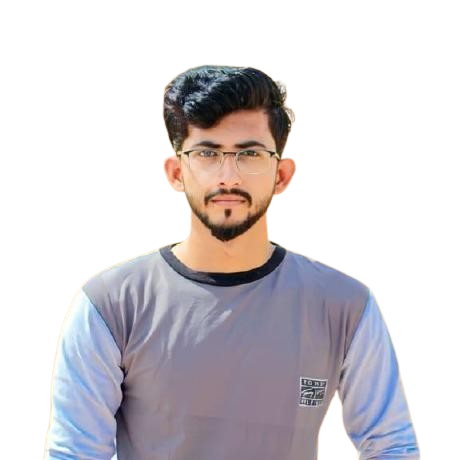

In [84]:
%pip install -qU langchain-pinecone langchain-google-genai  google-generativeai

In [85]:
from google.colab import userdata
from pinecone import Pinecone, ServerlessSpec


pinecone_api_key = userdata.get('PINECONE_API_KEY')
pc = Pinecone(api_key=pinecone_api_key)

In [87]:
import time
index_name = "piaic-rag-project-2"  # all lowercase and hyphens only

pc.create_index(
    name=index_name,
    dimension=768,
    metric="cosine",
    spec=ServerlessSpec(cloud="aws", region="us-east-1"),
)

index = pc.Index(index_name)


In [88]:
from langchain_google_genai import GoogleGenerativeAIEmbeddings
import os

os.environ['GOOGLE_API_KEY'] = userdata.get('GOOGLE_API_KEY')

embeddings = GoogleGenerativeAIEmbeddings(model='models/text-embedding-004')

In [89]:
import google.generativeai as genai

api_key = userdata.get("GOOGLE_API_KEY")
if not api_key:
    raise ValueError("No valid API Key found in userdata.")

# Use the API key explicitly with genai.configure()
genai.configure(api_key=api_key)

# Now you can call list_models
available_models = genai.list_models()
for m in available_models:
    print(m.name, m.supported_generation_methods)


models/chat-bison-001 ['generateMessage', 'countMessageTokens']
models/text-bison-001 ['generateText', 'countTextTokens', 'createTunedTextModel']
models/embedding-gecko-001 ['embedText', 'countTextTokens']
models/gemini-1.0-pro-latest ['generateContent', 'countTokens']
models/gemini-1.0-pro ['generateContent', 'countTokens']
models/gemini-pro ['generateContent', 'countTokens']
models/gemini-1.0-pro-001 ['generateContent', 'countTokens', 'createTunedModel']
models/gemini-1.0-pro-vision-latest ['generateContent', 'countTokens']
models/gemini-pro-vision ['generateContent', 'countTokens']
models/gemini-1.5-pro-latest ['generateContent', 'countTokens']
models/gemini-1.5-pro-001 ['generateContent', 'countTokens', 'createCachedContent']
models/gemini-1.5-pro-002 ['generateContent', 'countTokens', 'createCachedContent']
models/gemini-1.5-pro ['generateContent', 'countTokens']
models/gemini-1.5-pro-exp-0801 ['generateContent', 'countTokens']
models/gemini-1.5-pro-exp-0827 ['generateContent', 'c

In [90]:
vector = embeddings.embed_query("Hello RAG")

In [91]:
vector[:5]

[-0.0033660035114735365,
 -0.02857319451868534,
 -0.045181941241025925,
 -0.029038600623607635,
 -0.022096384316682816]

In [92]:
from langchain_pinecone import PineconeVectorStore

vector_store = PineconeVectorStore(
    index=index,
    embedding=embeddings,
)

In [93]:
from uuid import uuid4

from langchain_core.documents import Document

document_1 = Document(
    page_content="I had chocalate chip pancakes and scrambled eggs for breakfast this morning.",
    metadata={"source": "tweet"},
)

In [94]:
document_1

Document(metadata={'source': 'tweet'}, page_content='I had chocalate chip pancakes and scrambled eggs for breakfast this morning.')

In [95]:
from uuid import uuid4

from langchain_core.documents import Document

document_1 = Document(
    page_content="I had chocalate chip pancakes and scrambled eggs for breakfast this morning.",
    metadata={"source": "tweet"},
)

document_2 = Document(
    page_content="The weather forecast for tomorrow is cloudy and overcast, with a high of 62 degrees.",
    metadata={"source": "news"},
)

document_3 = Document(
    page_content="Building an exciting new project with LangChain - come check it out!",
    metadata={"source": "tweet"},
)

document_4 = Document(
    page_content="Robbers broke into the city bank and stole $1 million in cash.",
    metadata={"source": "news"},
)

document_5 = Document(
    page_content="Wow! That was an amazing movie. I can't wait to see it again.",
    metadata={"source": "tweet"},
)

document_6 = Document(
    page_content="Is the new iPhone worth the price? Read this review to find out.",
    metadata={"source": "website"},
)

document_7 = Document(
    page_content="The top 10 soccer players in the world right now.",
    metadata={"source": "website"},
)

document_8 = Document(
    page_content="LangGraph is the best framework for building stateful, agentic applications!",
    metadata={"source": "tweet"},
)

document_9 = Document(
    page_content="The stock market is down 500 points today due to fears of a recession.",
    metadata={"source": "news"},
)

document_10 = Document(
    page_content="I have a bad feeling I am going to get deleted :(",
    metadata={"source": "tweet"},
)

documents = [
    document_1,
    document_2,
    document_3,
    document_4,
    document_5,
    document_6,
    document_7,
    document_8,
    document_9,
    document_10,
]

In [14]:
len(documents)

10

In [15]:
uuids = [str(uuid4()) for _ in range(len(documents))]

In [16]:
from uuid import uuid4
uuid4()

UUID('1c969fa2-d499-42d3-9565-ad522aa99efe')

In [17]:
vector_store.add_documents(documents=documents, ids=uuids)

['7b80f674-7c1c-4e43-860d-a4210760c618',
 'c2ea31da-05a7-4836-8cf2-6822fcca25da',
 '4e22f0ed-a2ab-47e7-b80d-7de35d75ab9e',
 '731322cf-33d1-4b31-9bb1-13e717cd0cd7',
 '24850b73-d1fa-4c3e-bbdd-efca221d4e45',
 '6336a5eb-bc4c-4c42-bd5d-7079acf208b4',
 'c09675ae-1d7a-4a1d-93ec-9be06c222216',
 '97b639cb-6688-422c-98c9-a172235a63db',
 '4e07439d-bfc5-4572-9628-5b5a4e4e7818',
 '0ea0defd-c7db-43bc-90f4-cde8c924214f']

In [96]:
results = vector_store.similarity_search(
    "LangChain provides abstractions to make working with LLMs easy",
    k=2,
    filter={"source": "tweet"},
)
for res in results:
    print(f"* {res.page_content} [{res.metadata}]")

In [97]:
results = vector_store.similarity_search_with_score(
    "Will it be hot tomorrow?", k=1, filter={"source": "news"}
)
for res, score in results:
    print(f"* [SIM={score:3f}] {res.page_content} [{res.metadata}]")

In [98]:
from langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(
    model="gemini-1.5-flash",
    temperature=0,
    max_tokens=None,
    timeout=None,
    max_retries=2,
    # other params...
)

In [99]:
def vector_search(query:str):
  # vector search
  vector_results = vector_store.similarity_search(query, k=1, filter={"source": "news"})
  # pass to model vector result + User Query
  final_answer = llm.invoke(f'Answer This Query {query} based on this context {vector_results}')
  return final_answer


In [100]:
result = vector_search("Greet me i'm Abdullah?")
#

In [101]:
result.content

'Hello Abdullah!'

In [102]:
result = vector_search('What is my name?')

In [103]:
result.content

'I cannot answer the question "What is my name?" based on the provided context, which is an empty set [].  There is no information about your name.'

## NOw We Use Chroma DB

In [104]:
!pip install -Uq langchain-chroma

In [105]:
import getpass
import os

In [106]:
from langchain_chroma import Chroma
# from langchain_openai import OpenAIEmbeddings

vectorstore = Chroma.from_documents(
    documents,
    embedding=embeddings)

In [107]:
list(dir(vectorstore))

['_Chroma__ensure_collection',
 '_Chroma__query_collection',
 '_LANGCHAIN_DEFAULT_COLLECTION_NAME',
 '__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_asimilarity_search_with_relevance_scores',
 '_chroma_collection',
 '_client',
 '_client_settings',
 '_collection',
 '_collection_metadata',
 '_collection_name',
 '_cosine_relevance_score_fn',
 '_embedding_function',
 '_euclidean_relevance_score_fn',
 '_get_retriever_tags',
 '_max_inner_product_relevance_score_fn',
 '_persist_directory',
 '_select_relevance_score_fn',
 '_similarity_search_with_relevance_scores',
 'aadd_documents',
 'aadd_texts',
 'add_

In [108]:
vectorstore

In [109]:
vectorstore.similarity_search("chocolate")

[Document(id='645834cd-e3d3-4ceb-a1ad-023fd3f2188b', metadata={'source': 'tweet'}, page_content='I had chocalate chip pancakes and scrambled eggs for breakfast this morning.'),
 Document(id='a35785f8-275f-40a3-ba8a-a3d34fc8de17', metadata={'source': 'tweet'}, page_content="Wow! That was an amazing movie. I can't wait to see it again."),
 Document(id='ecbe3648-2e63-42cc-a569-7263373efcf5', metadata={'source': 'tweet'}, page_content='Building an exciting new project with LangChain - come check it out!'),
 Document(id='a5d30d5c-bfcb-49ce-b156-2c6693806afd', metadata={'source': 'news'}, page_content='The stock market is down 500 points today due to fears of a recession.')]

In [30]:
await vectorstore.asimilarity_search("movie")

[Document(id='d172b753-4715-4745-9588-777265461994', metadata={'source': 'tweet', 'text': "Wow! That was an amazing movie. I can't wait to see it again."}, page_content="Wow! That was an amazing movie. I can't wait to see it again."),
 Document(id='5529c15d-e225-4ac4-9063-7ccf54c41788', metadata={'source': 'news', 'text': 'The stock market is down 500 points today due to fears of a recession.'}, page_content='The stock market is down 500 points today due to fears of a recession.'),
 Document(id='4428a424-64f9-45c8-9549-c4839f8822a9', metadata={'source': 'tweet', 'text': 'Building an exciting new project with LangChain - come check it out!'}, page_content='Building an exciting new project with LangChain - come check it out!'),
 Document(id='62eb78bd-2cf3-4c59-81ed-ec0029ae5c12', metadata={'source': 'news', 'text': 'Robbers broke into the city bank and stole $1 million in cash.'}, page_content='Robbers broke into the city bank and stole $1 million in cash.')]

In [110]:
# Note that providers implement different scores; Chroma here
# returns a distance metric that should vary inversely with
# similarity.

vectorstore.similarity_search_with_score("chocolate")

[(Document(id='645834cd-e3d3-4ceb-a1ad-023fd3f2188b', metadata={'source': 'tweet'}, page_content='I had chocalate chip pancakes and scrambled eggs for breakfast this morning.'),
  1.0935707092285156),
 (Document(id='a35785f8-275f-40a3-ba8a-a3d34fc8de17', metadata={'source': 'tweet'}, page_content="Wow! That was an amazing movie. I can't wait to see it again."),
  1.1966055631637573),
 (Document(id='ecbe3648-2e63-42cc-a569-7263373efcf5', metadata={'source': 'tweet'}, page_content='Building an exciting new project with LangChain - come check it out!'),
  1.2126556634902954),
 (Document(id='a5d30d5c-bfcb-49ce-b156-2c6693806afd', metadata={'source': 'news'}, page_content='The stock market is down 500 points today due to fears of a recession.'),
  1.2140178680419922)]

In [111]:
embedding = embeddings.embed_query("Chocolate")# convert cat into vector

vectorstore.similarity_search_by_vector(embedding)

[Document(id='645834cd-e3d3-4ceb-a1ad-023fd3f2188b', metadata={'source': 'tweet'}, page_content='I had chocalate chip pancakes and scrambled eggs for breakfast this morning.'),
 Document(id='a35785f8-275f-40a3-ba8a-a3d34fc8de17', metadata={'source': 'tweet'}, page_content="Wow! That was an amazing movie. I can't wait to see it again."),
 Document(id='bf70af7c-6475-4413-a727-2bbc61befe06', metadata={'source': 'tweet'}, page_content='I have a bad feeling I am going to get deleted :('),
 Document(id='a5d30d5c-bfcb-49ce-b156-2c6693806afd', metadata={'source': 'news'}, page_content='The stock market is down 500 points today due to fears of a recession.')]

# Retrievers

In [112]:
from langchain_core.documents import Document
from langchain_core.runnables import RunnableLambda

retriever = RunnableLambda(vectorstore.similarity_search).bind(k=1)  # select top result

retriever.batch(["chip"])

[[Document(id='645834cd-e3d3-4ceb-a1ad-023fd3f2188b', metadata={'source': 'tweet'}, page_content='I had chocalate chip pancakes and scrambled eggs for breakfast this morning.')]]

In [114]:
from langchain_google_genai import ChatGoogleGenerativeAI
from google.colab import userdata



llm = ChatGoogleGenerativeAI(model="gemini-1.5-flash",
                             api_key = userdata.get('GOOGLE_API_KEY')
)

In [115]:
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.runnables import RunnablePassthrough

message = """
Answer this question using the provided context only.

{question}

Context:
{context}
"""

In [116]:
prompt = ChatPromptTemplate.from_messages([("human", message)])

# RAG

In [117]:
rag_chain = {"context": retriever, "question": RunnablePassthrough()} | prompt | llm


In [118]:
response = rag_chain.invoke("tell about cow?")

print(response.content)

The provided text does not contain any information about cows.


# Now use google gemini embedding model for retriver
https://python.langchain.com/api_reference/google_genai/embeddings/langchain_google_genai.embeddings.GoogleGenerativeAIEmbeddings.html#langchain_google_genai.embeddings.GoogleGenerativeAIEmbeddings

In [1]:
!pip install -Uq facenet-pytorch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 22.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 37.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.5/755.5 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 84.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 70.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 36.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.

In [2]:
!pip install -Uq pillow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 29.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
facenet-pytorch 2.6.0 requires Pillow<10.3.0,>=10.2.0, but you have pillow 11.1.0 which is incompatible.


In [3]:
import torch
import torch.nn as nn
import torchvision.models as models

import torchvision.transforms as transforms
from PIL import Image

In [4]:
from facenet_pytorch import MTCNN, InceptionResnetV1

model = InceptionResnetV1(pretrained='vggface2').eval()
model

  0%|          | 0.00/107M [00:00<?, ?B/s]

InceptionResnetV1(
  (conv2d_1a): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU()
  )
  (conv2d_2a): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU()
  )
  (conv2d_2b): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU()
  )
  (maxpool_3a): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2d_3b): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU()
  )
  (conv2d_4a): 

In [5]:
# Preprocessing function to transform the image into a tensor
def preprocess_image(image_path):
    image = Image.open(image_path).convert('RGB')
    preprocess = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    return preprocess(image).unsqueeze(0)

# Function to create image embeddings
def create_image_embedding(image_path):
    try:
        input_tensor = preprocess_image(image_path)
        with torch.no_grad():
            embeddings = model(input_tensor)# ebedding important line
        return embeddings.squeeze().numpy()
    except Exception as e:
        print("Error:", e)
        return None

In [6]:
!mkdir images

In [7]:
# prompt: create python function where we provide image url and imag_name then it save in images folder

import requests
import os

def save_image_from_url(image_url, image_name):
  """
  Downloads an image from a URL and saves it to the 'images' folder.

  Args:
    image_url: The URL of the image to download.
    image_name: The name of the file to save the image as.
  """
  try:
    if not os.path.exists("images"):
      os.makedirs("images")

    image_path = os.path.join("images", image_name)

    response = requests.get(image_url, stream=True)
    response.raise_for_status()  # Raise an exception for bad status codes

    with open(image_path, 'wb') as file:
      for chunk in response.iter_content(chunk_size=8192):
        file.write(chunk)

    print(f"Image saved to: {image_path}")
  except requests.exceptions.RequestException as e:
    print(f"Error downloading image: {e}")
  except Exception as e:
    print(f"An error occurred: {e}")


In [8]:
# Example usage
image_path = "./images/a2.jpg"
q2 = create_image_embedding(image_path)

# 'embedding' now contains a dense vector representation of the image
print("Image Embedding Shape:", q2.shape)
print("Image Embedding:", q2)

Image Embedding Shape: (512,)
Image Embedding: [-3.96144278e-02 -6.29611139e-04 -3.23139317e-02  7.42852762e-02
 -4.04314138e-02  2.32907999e-02  6.29734388e-03  3.41908336e-02
  1.28629357e-02 -9.68633592e-02 -2.26308685e-02  5.19554839e-02
  5.05318604e-02  2.70151105e-02 -7.44931120e-03 -8.18063468e-02
 -1.09668383e-02  7.78055042e-02  4.41039476e-04 -2.18602866e-02
 -7.74376327e-03 -1.90062001e-02  3.41277570e-02  2.73474604e-02
  7.68685564e-02 -4.13833698e-03  2.36151405e-02  4.64841537e-02
  2.54580788e-02  3.83891258e-03  2.80001201e-02  1.64792908e-03
 -6.30987212e-02 -2.25403961e-02 -2.78096236e-02  7.45090917e-02
 -7.96897933e-02  4.88153845e-02 -7.42103681e-02  3.84138431e-03
  2.92612836e-02 -3.55984457e-02 -2.07909290e-02 -8.26876760e-02
  7.88201857e-03 -2.65833680e-02 -3.21499817e-02  2.81397160e-02
 -7.79032474e-03 -5.62197343e-02  1.38547756e-02 -6.21309329e-04
  7.72540793e-02  6.95306510e-02 -3.10184713e-02  1.79098565e-02
 -4.83225696e-02  1.16739526e-01  2.7272667

In [9]:
image_path = "./images/h2.jpg"
cat2 = create_image_embedding(image_path)

# 'embedding' now contains a dense vector representation of the image
print("Image Embedding Shape:", cat2.shape)
print("Image Embedding:", cat2)


Image Embedding Shape: (512,)
Image Embedding: [ 1.13814566e-02 -7.28985667e-02 -5.71957342e-02  6.58370703e-02
 -1.01623312e-02  2.01909337e-02 -3.05143520e-02  4.81270887e-02
 -2.39332579e-02  3.57636884e-02 -2.73178499e-02  8.51163715e-02
 -6.01468682e-02 -9.99861024e-03  4.68154531e-03  3.12321959e-03
  4.31235582e-02  1.54663976e-02  2.78118718e-02 -3.18639949e-02
  2.82261148e-02  5.76810166e-02  3.15115191e-02  4.66569252e-02
 -1.40658934e-02  2.68797521e-02  3.81291583e-02  5.22073992e-02
 -5.70526812e-04  3.67090292e-02 -4.31959629e-02 -5.35456799e-02
  5.03084101e-02 -3.16450819e-02  8.54852144e-03  6.20165095e-03
 -5.01859225e-02  1.25031127e-02  1.52727813e-02 -4.37847758e-03
  3.03024575e-02 -1.94665481e-04  1.46541419e-02 -4.69945893e-02
 -4.81768809e-02  5.23975194e-02 -5.81657747e-03 -9.55133233e-03
 -4.90938909e-02  4.21601832e-02  4.52677421e-02  5.99188581e-02
  2.70609241e-02 -1.70305371e-02 -6.94023669e-02 -1.74068508e-03
  2.24639457e-02  8.21097791e-02  3.5898987

In [10]:
a1 = create_image_embedding("./images/a1.jpg")
a2 = create_image_embedding("./images/a2.jpg")
h1 = create_image_embedding("./images/h1.jpg")
h2 = create_image_embedding("./images/h2.jpg")
m1 = create_image_embedding("./images/m1.jpg")
m2 = create_image_embedding("./images/m2.jpg")

In [11]:
!pip install -Uq milvus-lite pymilvus

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 MB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.9/229.9 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 55.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 3.5 MB/s eta 0:00:00


In [12]:
from pymilvus import MilvusClient
client = MilvusClient("./milvus_demo.db")

In [13]:
from pymilvus import MilvusClient
import numpy as np

client = MilvusClient("./milvus_demo.db")
client.create_collection(
    collection_name="images",
    dimension=512  # The vectors we will use in this demo has 384 dimensions
)

In [14]:
data = [
    {"id": 1,
     "person_name": "Abdullah",
     "vector":a1},
    {"id": 2,
     "person_name": "Abdullah",
     "vector":a2},
    {"id": 3,
     "person_name": "Hameed",
     "vector": h1},
    {"id": 4,
     "person_name": "Hameed",
     "vector": h2},
    {"id": 5,
     "person_name": "Aseem Khan",
     "vector":m1},
    {"id": 6,
     "person_name": "Aseem Khan",
     "vector": m2}
]

In [15]:
res = client.insert(
    collection_name="images",
    data=data
)

In [16]:
res = client.search(
    collection_name="images",
    data=[m1],
    limit=1,
    output_fields=["id", "person_name"],
)
print(res)


data: ["[{'id': 5, 'distance': 1.0, 'entity': {'person_name': 'Aseem Khan', 'id': 5}}]"] 


In [19]:
a3 = create_image_embedding('./images/a3.jpg')
a3

array([ 2.97870785e-02,  9.87742748e-03, -5.34784868e-02,  1.05098285e-01,
        4.50614803e-02,  7.42977811e-03, -3.06975935e-02,  1.23910919e-01,
       -1.33453067e-02, -3.24687846e-02, -1.39784697e-03,  4.12045196e-02,
        5.97762736e-03,  7.70019973e-03,  2.92334650e-02, -8.18400830e-02,
       -3.24272811e-02,  1.14411511e-01, -1.73321925e-02,  2.43304018e-02,
       -6.03615791e-02,  6.62357509e-02,  2.09483076e-02, -5.54759391e-02,
        2.83378754e-02, -5.15483320e-03,  4.70330603e-02,  1.99977923e-02,
        4.78630699e-02,  3.24610155e-03,  3.48461531e-02, -7.89483078e-03,
       -2.08498500e-02,  1.28581682e-02,  2.66305692e-02, -1.50371147e-02,
       -4.59063090e-02,  1.84161179e-02, -4.19828258e-02,  1.10845733e-02,
        1.57244727e-02,  1.00553874e-02,  1.90027654e-02, -5.21527342e-02,
       -2.03619525e-02, -3.06354165e-02, -5.17996438e-02,  1.37794800e-02,
       -7.17916712e-02, -4.55956683e-02, -1.40792392e-02, -4.22603451e-02,
        1.17106892e-01,  

In [21]:
res = client.search(
    collection_name="images",
    data=[a3],
    limit=2,
    output_fields=["id", "person_name"],
)
print(res)


data: ["[{'id': 2, 'distance': 0.622202455997467, 'entity': {'person_name': 'Abdullah', 'id': 2}}, {'id': 1, 'distance': 0.2795482277870178, 'entity': {'person_name': 'Abdullah', 'id': 1}}]"] 
